# EarthMoonSystem.ipynb

## This notebook sets up some parameters for the Earth/Moon Planar Circular Restricted Three-Body Problem (PCR3BP), finds the Lagrange points, plots the effective potential contours, and solves the CR3BP ODE's to generate a trajectory.

In [60]:
using ThreeBodyProblem
using DifferentialEquations
using Plots

In [61]:
gr() # This command sets GR as our plotting backend

Plots.GRBackend()

## When declaring variables, I like to add a comment with the units in curly brackets as well as a description

In [62]:
μ₁ = 398600 # {km³/s²} gravitational parameter of Earth
μ₂ = 4902   # {km³/s²} gravitational parameter of the Moon
d = 384400  # {km} average distance between Earth and the Moon

384400

In [63]:
p = [μ₁, μ₂, d] # concatenate the parameters into one array

3-element Array{Int64,1}:
 398600
   4902
 384400

## Now we plug this parameter array into some functions to calculate the location of L1

In [64]:
L1 = findL1(p) # calculate the Lagrange point L1 for the given system parameters p

3-element Array{Float64,1}:
 321713.8570517506
      0.0
      0.0

## You can calculate all the Lagrange points and just select the one you're interested in

In [65]:
Lpts = findLpts(p)
L4 = Lpts[4]

3-element Array{Float64,1}:
 187530.06329584488
 332900.16521473817
      0.0

In [66]:
R₁,R₂ = findR1R2(p) # {km} distances of Primary and Secondary bodies from origin

(4669.936704155122, 379730.0632958449)

In [67]:
ωₛ = sqrt((μ₁ + μ₂)/d^3) # {rad/s} rotation rate of system

2.665310298373478e-6

## Here we set up a mesh grid of 100 points centered at the origin

In [68]:
N = 100
X = range(-1.5*d,1.5*d,length=N)
Y = range(-d,d,length=N)

-384400.0:7765.656565656565:384400.0

In [69]:
gr()
f(x,y) = begin
    -(x^2 + y^2)*ωₛ^2/2 - μ₁/sqrt((x+R₁)^2 + y^2) - μ₂/sqrt((x-R₂)^2 + y^2)
    # rv = [x; y; 0; 0; 0; 0]
    # findUeff(rv,p)
end
contour(X,Y,f,levels=200,fill=true)

## Some more parameters describing our system

In [70]:
Rₑ = 6378.0 # {km} radius of the Earth
Rₘ = 1738.0 # {km} radius of the Moon

1738.0

## Here we define the initial conditions of our injection orbit

In [71]:
h = 200.0           # {km} altitude of parking orbit
vᵢ = 10.92367104    # {km/s} injection velocity in rotating frame
ϕ = 47.70061087     # {°} injection angle, measured from +y

47.70061087

In [72]:
r₀ = [-R₁ - (Rₑ + 200)*cosd(ϕ); -(Rₑ + 200)*sind(ϕ); 0]
v₀ = vᵢ*[sind(ϕ); -cosd(ϕ); 0];
rv₀ = [r₀;v₀] # {km; km/s} our initial state 

6-element Array{Float64,1}:
 -9096.961145507787
 -4865.340542620438
     0.0
     8.07956515432666
    -7.3516811619605145
     0.0

## Make sure to use float values rather than integers (e.g. 0. instead of 0) when setting up the timespan for the solver.

In [73]:
tspan = (0.,86400*6.) # {sec} 6 day span

(0.0, 518400.0)

## Here we set up our ODE and solve it

In [74]:
prob = ODEProblem(CR3BPdynamics!,rv₀,tspan,p) # CR3BPdynamics! is our in-place dynamics function
sol = solve(prob,reltol=1e-6)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 110-element Array{Float64,1}:
      0.0
      0.19809069556749268
      2.1789976512424194
     21.988067207991683
     92.77526958590991
    196.70519159425237
    313.66458981957004
    448.238947843345
    597.2049863320312
    763.4100058220295
    948.2712928148212
   1155.8110488705502
   1390.210416340324
      ⋮
 502204.5219340589
 502776.4665831383
 503450.8619460844
 504247.1790354862
 505193.9752620015
 506321.7477130303
 507669.10994072864
 509281.40815959574
 511214.109047643
 513532.78108291596
 516292.6271665352
 518400.0
u: 110-element Array{Array{Float64,1},1}:
 [-9096.961145507787, -4865.340542620438, 0.0, 8.07956515432666, -7.3516811619605145, 0.0]
 [-9095.360537973598, -4866.796709407592, 0.0, 8.080785257845982, -7.350339812191332, 0.0]
 [-9079.341186525837, -4881.34374796782, 0.0, 8.092961893716812, -7.336904230035766, 0.0]
 [-8917.838222786235, -5025.335334766077, 0.0, 8.212236092081602, -7

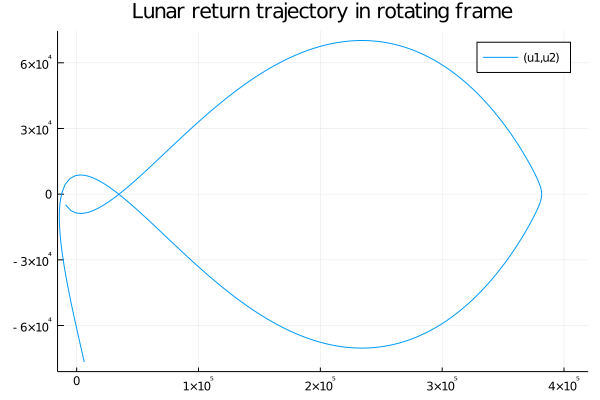

In [75]:
plot(sol,vars=(1,2),title="Lunar return trajectory in rotating frame")

## All done!